In [41]:
import os
import rawpy
import numpy as np
import matplotlib.pyplot as plt
import cv2
import astroalign as aa

In [48]:
path_to_images = "./data/"
file_names = list(filter(lambda x: x.endswith(".dng"), os.listdir(path_to_images)))


grayscale_imgs = []
imgs = []
for file in file_names:
    with rawpy.imread(path_to_images + file) as raw:
        raw_image = raw.raw_image.copy()
        # Convert to 64 bit float
        raw_image = raw_image.astype(np.float64)
        grayscale_imgs.append(raw_image)
        imgs.append(raw.postprocess(output_bps=16))
  

In [49]:
print(np.max(imgs[0]))
print(np.min(imgs[1]))
print(grayscale_imgs[0].shape)
print(imgs[0].shape)

65535
0
(3000, 4000)
(4000, 3000, 3)


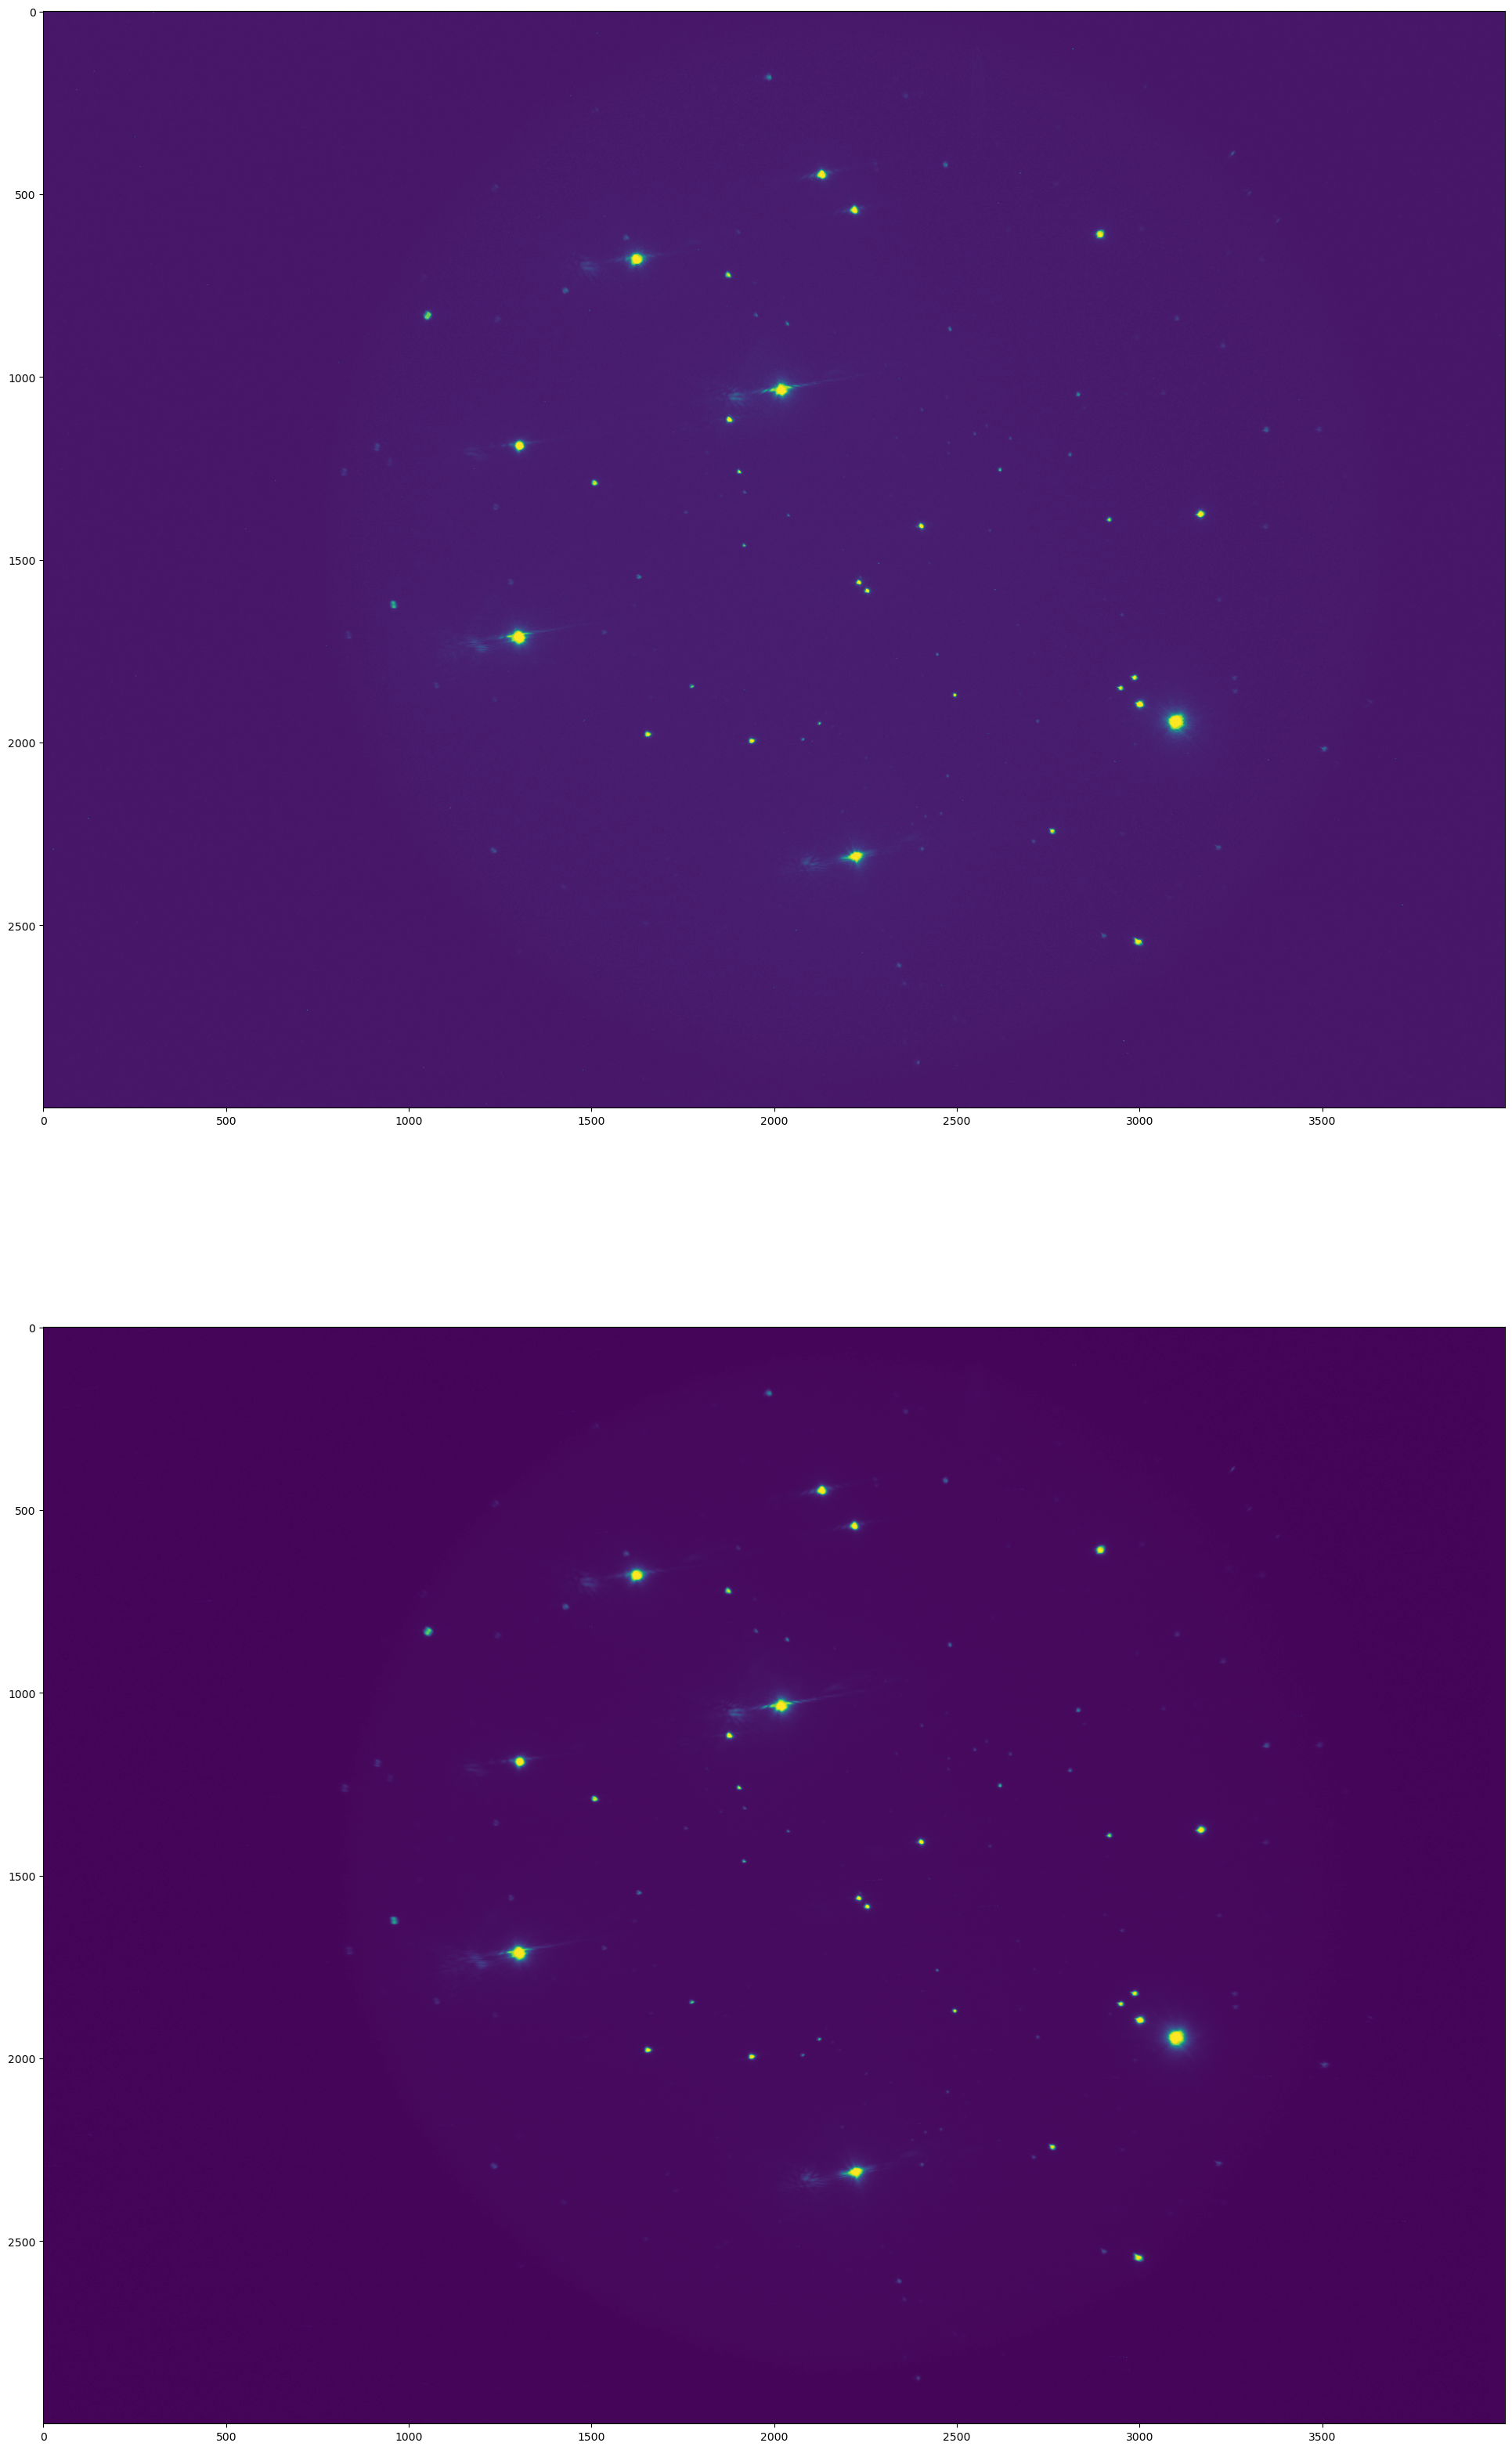

In [23]:
stacked_image = np.copy(grayscale_imgs[0])

for i in range(1, len(grayscale_imgs)):
    t, (sp, tp) = aa.find_transform(grayscale_imgs[i], grayscale_imgs[0], detection_sigma=10.0, min_area=10)
    
    aligned_image, _ = aa.apply_transform(t, grayscale_imgs[i], grayscale_imgs[0])
    
    # Add the aligned image to the stack
    stacked_image += aligned_image

# Normalize the stacked image
stacked_image /= len(grayscale_imgs)

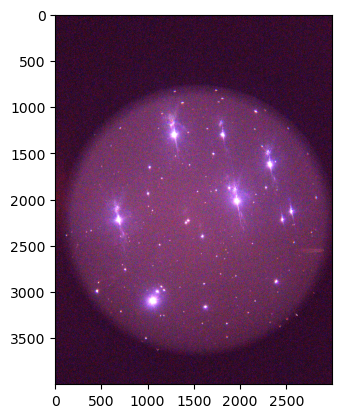

In [46]:
plt.imshow(imgs[0])

In [42]:
# Save the stacked image
cv2.imwrite("stacked_image.png", stacked_image)

True

1.0450157368613553
1.0717629909357853


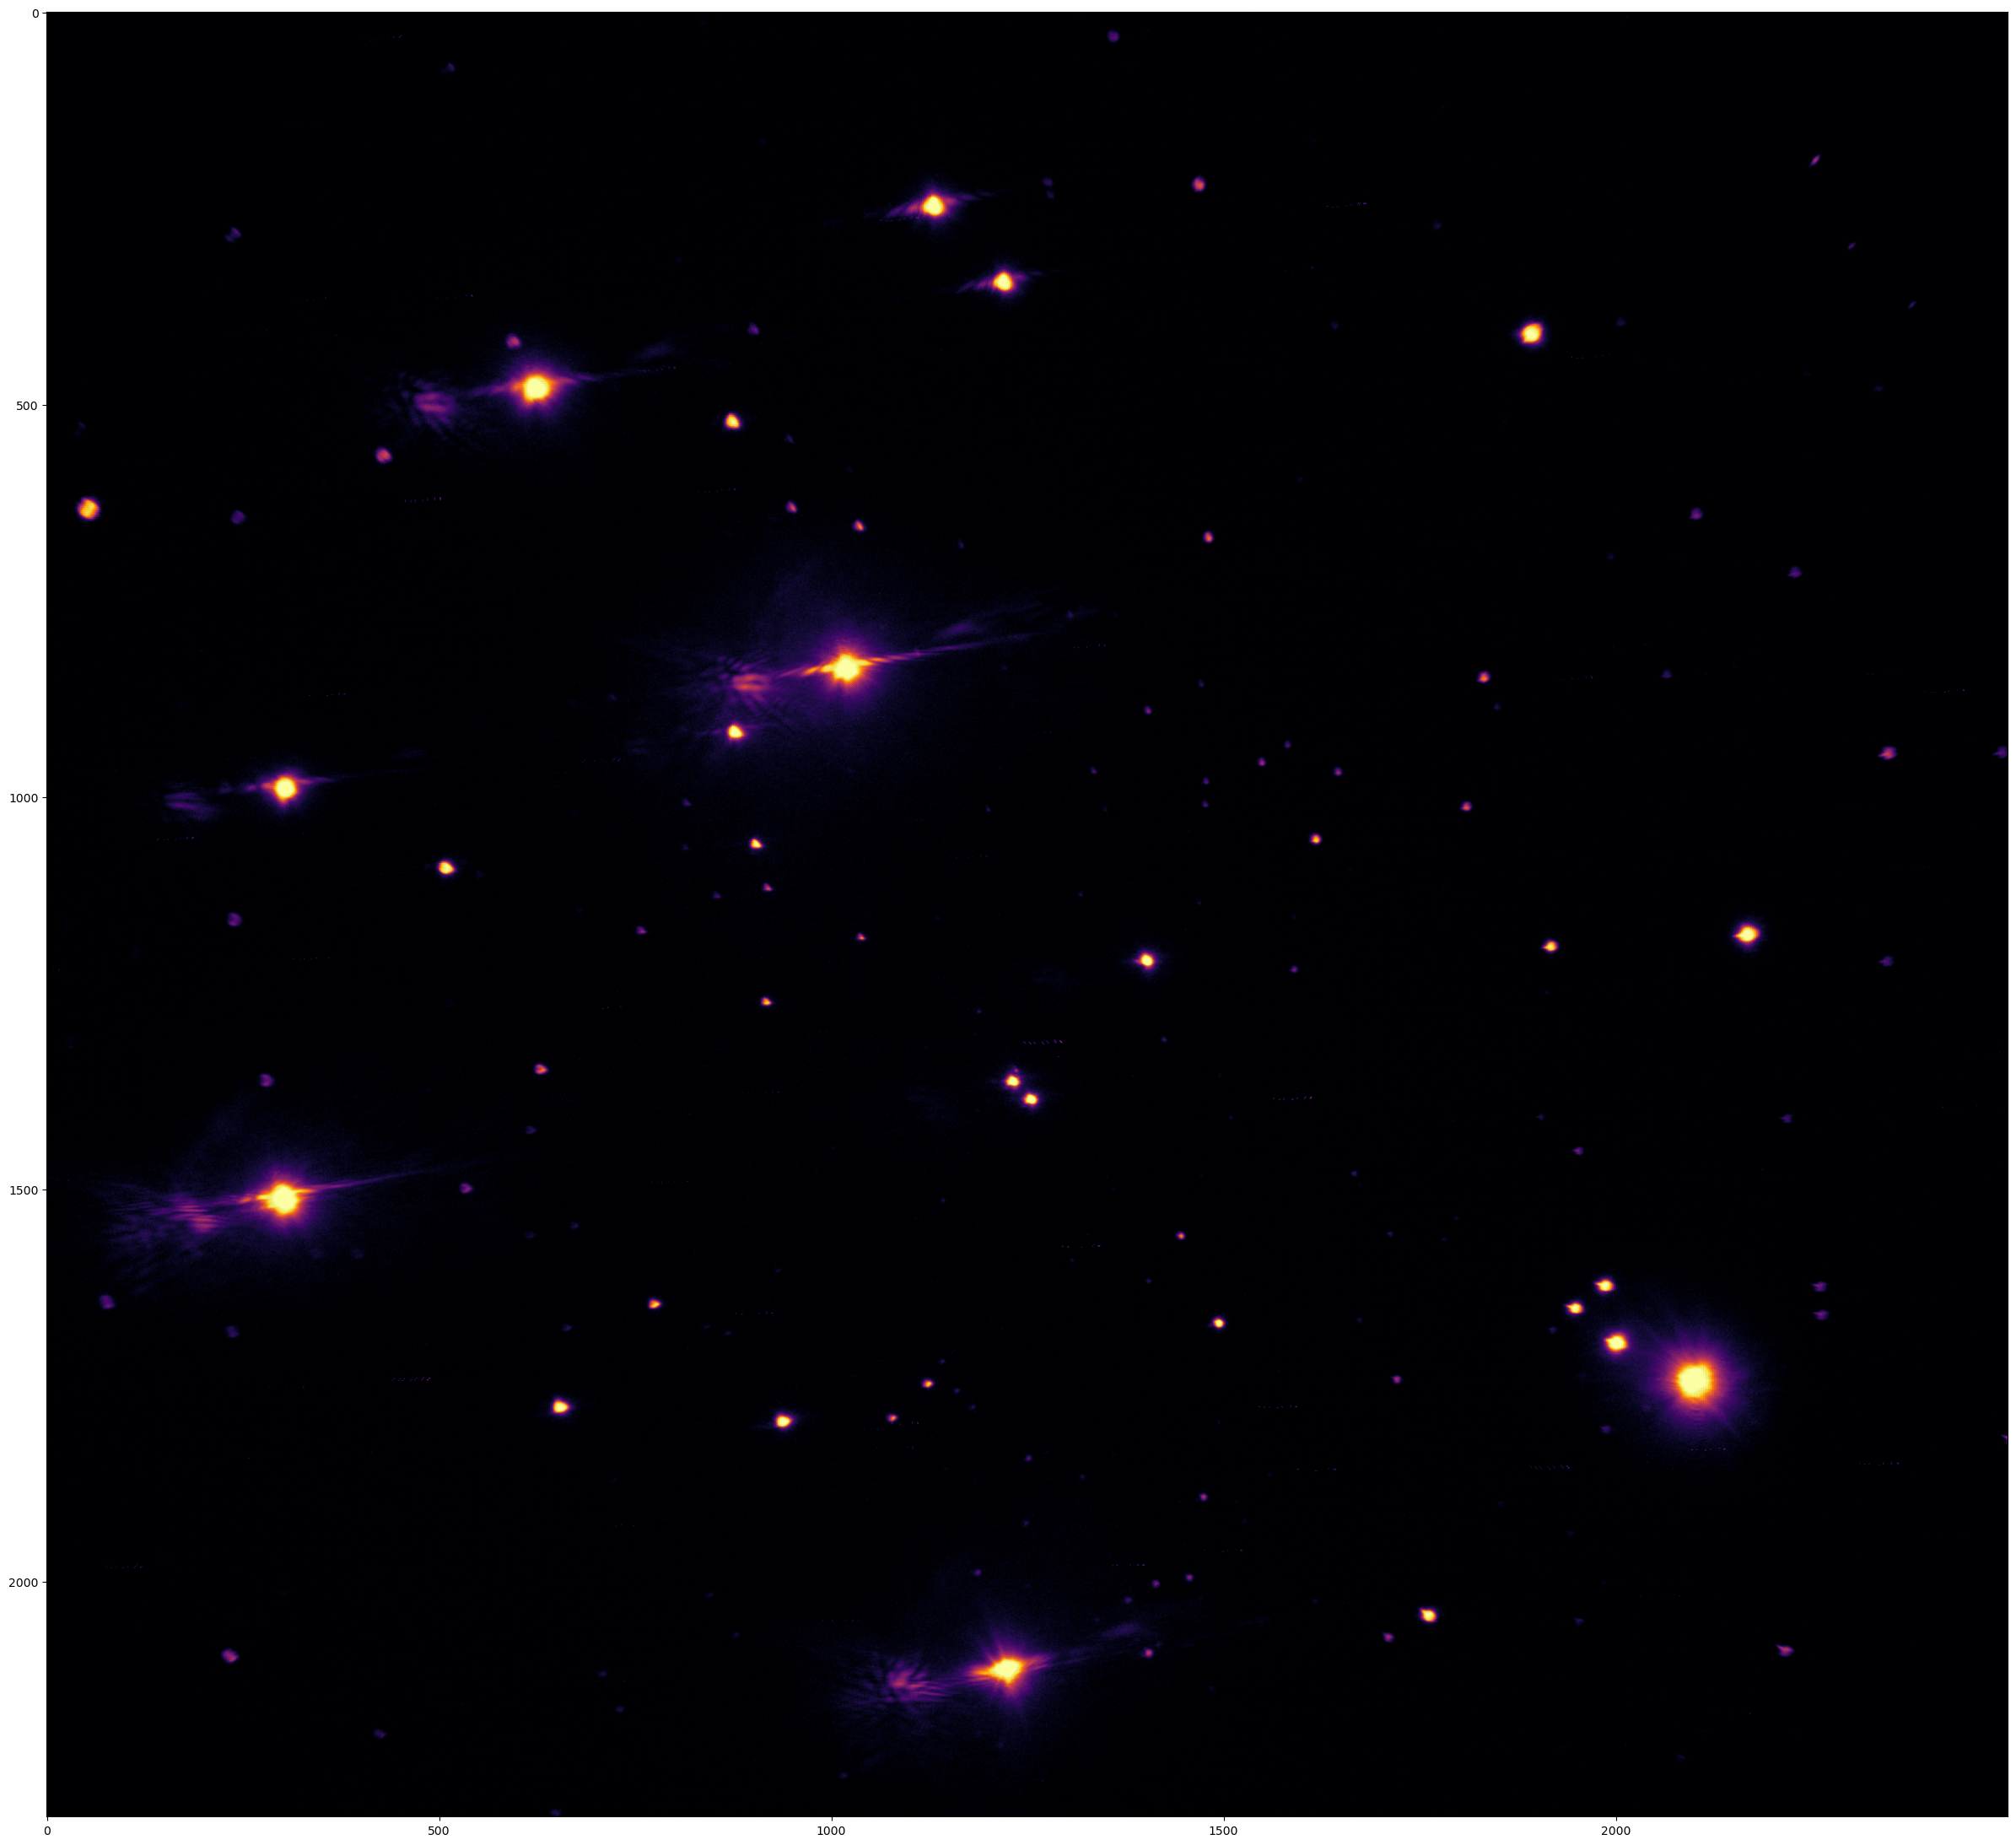

In [39]:
fig, ax = plt.subplots(1, 1)
# Plot the stacked images. Large figure, so we can see the details
fig.set_size_inches(30, 40)

enchanced_image = np.power(stacked_image, 0.01)

vmin = np.mean(enchanced_image[400:2000, 1500:3000])
vmax = np.max(enchanced_image[400:2000, 1500:3000])
print(vmin)
print(vmax)

ax.imshow(enchanced_image[200:2500, 1000:3500], cmap="inferno", vmin=vmin, vmax=vmax)